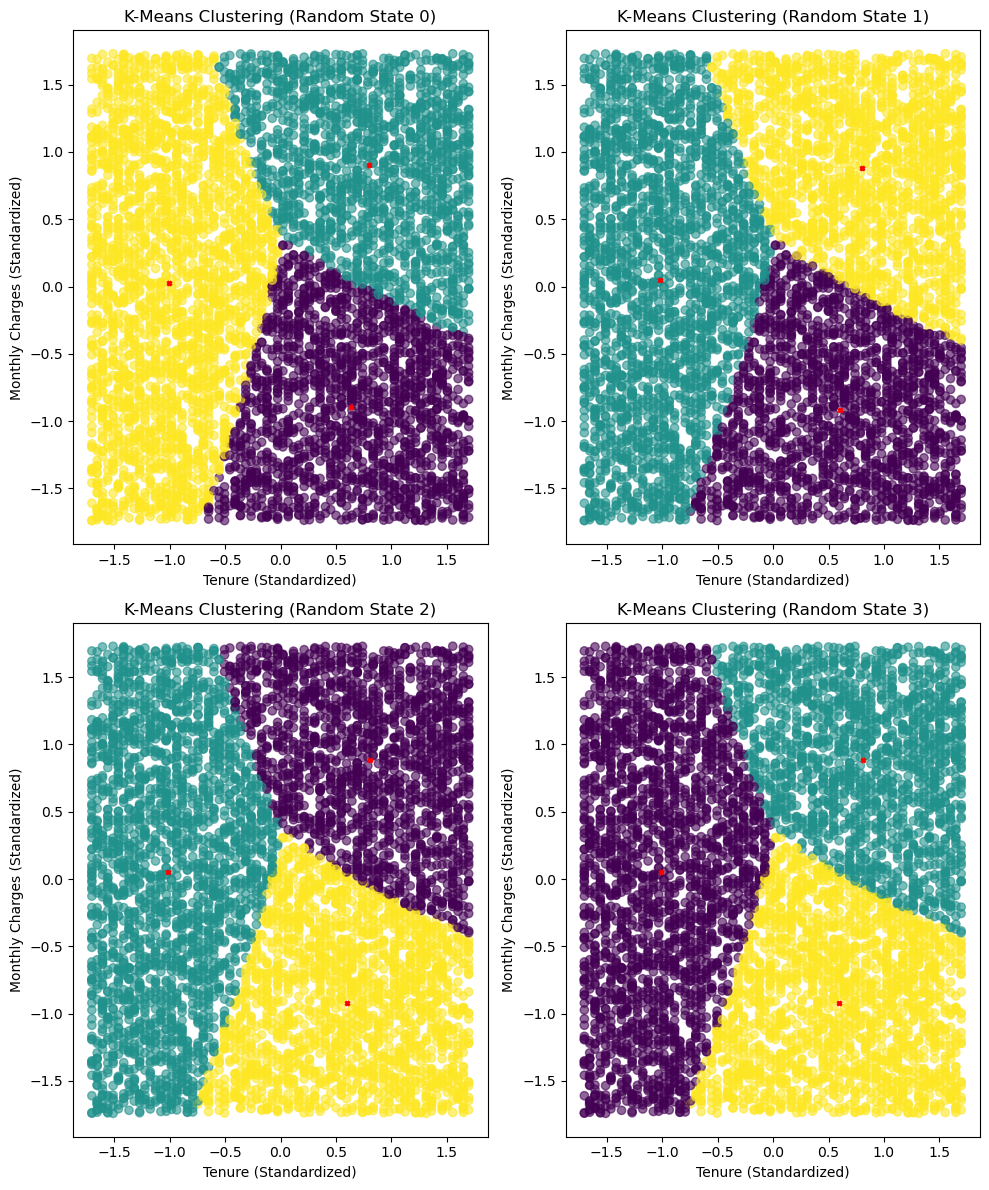

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


file_path = "customer_churn_data.csv"  
df = pd.read_csv("customer_churn_data.csv")

X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3  

fig, axes = plt.subplots(2, 2, figsize=(10, 12))

for i, ax in enumerate(axes.flatten()):
    kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=i)
    kmeans.fit(X_scaled)
    
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=10)
    
    ax.set_title(f'K-Means Clustering (Random State {i})')
    ax.set_xlabel("Tenure (Standardized)")
    ax.set_ylabel("Monthly Charges (Standardized)")

plt.tight_layout()
plt.show()
